# Datos entreneamiento Shift

En este notebook vamos a aplicar el shift para las obtener las columnas mas correlacionadas.

- __Datos recibidos:__ obtenidos de notebook __1-datos_entrenamiento_shift.ipynb__
- __Responsable:__ Daniel Bustillos
- __Contacto:__  juandaniel.bucam@gmail.com

__Notas del proyecto__
Necesitamos generar un csv con los niveles máximos, mínimo y promedio por día, se perderá la información de la estación, también generaremos el atributo PM10mean y PM25mean que representarán los valores de las últimas 24 horas de los contaminantes.

calidad de caire
pronostico contaminación

## Pasos
[X] Aplicar Shift con Correlaciones <br>
[X] Sacar minimo promedio y maximo <br>
[X] Obtener columnas más correlacionadas<br><br>

In [34]:
contaminante = "PM10"

In [35]:
import pandas as pd
pd.options.mode.chained_assignment = None 

In [36]:
data_hour_merge_24 = pd.read_csv('./datos_entrenamiento.csv')

In [37]:
data_hour_merge_24[data_hour_merge_24.id_station=="BJU"].head(10)

,index,CO,NO,NO2,NOX,O3,PM10,PM2.5,RH,SO2,TMP,WDR,WSP,dia,fecha,hora,id_station,mes,PM10mean,PM25mean
3219,59121,0.9,NaN,NaN,NaN,2.0,51.0,38.0,42.0,NaN,12.2,219.0,1.5,8,2016-01-08 00:00:00,0,BJU,1,NaN,NaN
3243,58552,NaN,NaN,NaN,NaN,1.0,25.0,9.0,59.0,NaN,10.8,145.0,1.4,8,2016-01-08 01:00:00,1,BJU,1,NaN,NaN
3268,58577,0.6,NaN,NaN,NaN,2.0,16.0,7.0,53.0,NaN,10.2,172.0,1.3,8,2016-01-08 02:00:00,2,BJU,1,NaN,NaN
3293,58602,0.7,NaN,NaN,NaN,1.0,18.0,8.0,60.0,NaN,9.3,200.0,1.3,8,2016-01-08 03:00:00,3,BJU,1,NaN,NaN
3318,58627,0.6,NaN,NaN,NaN,1.0,19.0,7.0,58.0,NaN,9.2,106.0,1.2,8,2016-01-08 04:00:00,4,BJU,1,NaN,NaN
3343,58652,0.7,NaN,NaN,NaN,1.0,26.0,14.0,59.0,NaN,9.2,319.0,1.4,8,2016-01-08 05:00:00,5,BJU,1,NaN,NaN
3368,58677,0.7,NaN,NaN,NaN,1.0,24.0,12.0,61.0,NaN,9.6,78.0,1.5,8,2016-01-08 06:00:00,6,BJU,1,NaN,NaN
3393,58702,0.8,NaN,NaN,NaN,1.0,19.0,8.0,63.0,NaN,9.7,126.0,1.4,8,2016-01-08 07:00:00,7,BJU,1,NaN,NaN
3418,58727,0.6,NaN,NaN,NaN,6.0,16.0,3.0,47.0,NaN,11.2,232.0,1.9,8,2016-01-08 08:00:00,8,BJU,1,NaN,NaN
3443,58752,1.0,NaN,NaN,NaN,10.0,26.0,5.0,44.0,NaN,12.7,209.0,2.2,8,2016-01-08 09:00:00,9,BJU,1,NaN,NaN


Quedémonos sin WSR:

In [38]:
data_hour_merge_24 = data_hour_merge_24[['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', "PM2.5",'RH', 'SO2', 'TMP',
       'WSP', 'dia', 'fecha', 'hora', 'id_station', 'mes',"PM10mean","PM25mean"]].reset_index(drop=True)

Hagamos una lista con todas las estaciones:

### Arreglemos las fechas:

In [39]:
data_hour_merge_24 = data_hour_merge_24[(data_hour_merge_24.fecha > "2015-12-01 23:00:00")]
data_hour_merge_24['dia'] = data_hour_merge_24['dia'].astype(str).astype(float) #arreglar!!!
data_hour_merge_24['mes'] = data_hour_merge_24['mes'].astype(str).astype(float)

Creemos un diccionario con __data_hour_merge_24__ dividido por estación:

In [40]:
estaciones = data_hour_merge_24.id_station.unique().tolist()

In [41]:
data_est = {}
for elem in estaciones:
    data_est[elem] = data_hour_merge_24[data_hour_merge_24.id_station == elem]

In [42]:
data_hour_merge_24 = data_hour_merge_24.dropna(subset=[contaminante]).reset_index(drop=True)#PM25

In [43]:
data_hour_merge_24.head(10)

,CO,NO,NO2,NOX,O3,PM10,PM2.5,RH,SO2,TMP,WSP,dia,fecha,hora,id_station,mes,PM10mean,PM25mean
0,1.1,15.0,40.0,55.0,2.0,53.0,17.0,NaN,19.0,NaN,NaN,2.0,2016-01-02 00:00:00,0,CAM,1.0,NaN,NaN
1,0.6,NaN,NaN,NaN,27.0,21.0,NaN,65.0,1.0,14.0,1.0,2.0,2016-01-02 00:00:00,0,CHO,1.0,NaN,NaN
2,0.5,4.0,17.0,21.0,21.0,17.0,NaN,69.0,NaN,13.2,0.9,2.0,2016-01-02 00:00:00,0,CUA,1.0,NaN,NaN
3,NaN,11.0,36.0,46.0,11.0,37.0,NaN,78.0,37.0,12.6,0.8,2.0,2016-01-02 00:00:00,0,CUT,1.0,NaN,NaN
4,0.9,23.0,33.0,55.0,6.0,33.0,NaN,69.0,7.0,14.9,0.7,2.0,2016-01-02 00:00:00,0,FAC,1.0,NaN,NaN
5,0.9,15.0,48.0,63.0,2.0,45.0,26.0,55.0,21.0,17.3,1.8,2.0,2016-01-02 00:00:00,0,HGM,1.0,NaN,NaN
6,1.0,12.0,45.0,57.0,4.0,40.0,NaN,NaN,16.0,NaN,NaN,2.0,2016-01-02 00:00:00,0,IZT,1.0,NaN,NaN
7,1.1,25.0,46.0,71.0,1.0,50.0,16.0,60.0,15.0,17.4,2.2,2.0,2016-01-02 00:00:00,0,MER,1.0,NaN,NaN
8,0.6,16.0,36.0,52.0,5.0,42.0,24.0,63.0,12.0,16.5,1.3,2.0,2016-01-02 00:00:00,0,MGH,1.0,NaN,NaN
9,0.9,19.0,35.0,54.0,2.0,56.0,28.0,62.0,11.0,17.8,1.9,2.0,2016-01-02 00:00:00,0,SAG,1.0,NaN,NaN


# Leamos el archivo de correlaciones 

Este archivo se generó en el notebook: __/home/paw/DanielBustillos/contaminación/correlaciones_pau/correlaciones_función_paulina.ipynb__

In [44]:
target = "PM10mean_y"

O3_corr = pd.read_csv("./correlacion/correlaciones_"+ target +".csv")
O3_corr = O3_corr.iloc[:,1:]

In [45]:
O3_corr.valor.min()

-0.42706242493161295

Vamos a quedarnos con las variables con corr>0.3:

- Para PM10 (O3_corr.valor > 0.6 o  O3_corr.valor < -0.6)
- Para O3 (O3_corr.valor > 0.44 o  O3_corr.valor < -0.44)

In [46]:
O3_corr_filtro = O3_corr[(O3_corr.valor > 0.55) | (O3_corr.valor < -0.55) ].reset_index(drop=True)

In [47]:
O3_corr_filtro.shape

(194, 3)

In [48]:
## comentar pq el valor de .44

Vamos a aplicar el shift para cada elemento de la tabla __O3_corr__:

In [49]:
def shit_corr(df):
    for i in range(len(O3_corr_filtro)):
        name_column = str( O3_corr_filtro.loc[i,"contaminante"] + "_" + str( O3_corr_filtro.loc[i,"horas"] ) ) 
        df[name_column] = df[O3_corr_filtro.loc[i,"contaminante"]].shift(int(float(str(O3_corr_filtro.loc[i,"horas"]))) ) 
    return df.dropna()

Aplicamos esta función para cada DF de cada estación:

In [50]:
data_shift = {}
for elem in data_est:
    data_shift[elem] = shit_corr(data_est[elem])

In [51]:
df_append = pd.DataFrame(columns = data_est["MER"].columns.tolist())

In [94]:
for key in data_est:
    df_append = df_append.append(data_est[key], ignore_index=True,sort=True)

In [95]:
df_append.head()

,CO,NO,NO2,NOX,O3,PM10,PM10_0.0,PM10_1.0,PM10_10.0,PM10_11.0,...,PM25mean_9.0,RH,SO2,TMP,WSP,dia,fecha,hora,id_station,mes
0,0.6,2.0,24.0,26.0,14.0,NaN,NaN,NaN,NaN,NaN,...,NaN,62.0,2.0,14.8,1.9,2.0,2016-01-02 00:00:00,0,AJM,1.0
1,0.5,2.0,18.0,20.0,14.0,NaN,NaN,NaN,NaN,NaN,...,NaN,86.0,12.0,11.6,1.6,2.0,2016-01-02 01:00:00,1,AJM,1.0
2,0.5,2.0,16.0,18.0,15.0,NaN,NaN,NaN,NaN,NaN,...,NaN,88.0,11.0,11.3,1.6,2.0,2016-01-02 02:00:00,2,AJM,1.0
3,0.5,1.0,12.0,13.0,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,79.0,11.0,11.4,1.9,2.0,2016-01-02 03:00:00,3,AJM,1.0
4,0.4,1.0,11.0,12.0,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,79.0,9.0,11.5,1.6,2.0,2016-01-02 04:00:00,4,AJM,1.0


In [96]:
df_append.columns.tolist()

['CO',
 'NO',
 'NO2',
 'NOX',
 'O3',
 'PM10',
 'PM10_0.0',
 'PM10_1.0',
 'PM10_10.0',
 'PM10_11.0',
 'PM10_12.0',
 'PM10_13.0',
 'PM10_14.0',
 'PM10_15.0',
 'PM10_16.0',
 'PM10_17.0',
 'PM10_18.0',
 'PM10_19.0',
 'PM10_2.0',
 'PM10_20.0',
 'PM10_21.0',
 'PM10_22.0',
 'PM10_23.0',
 'PM10_24.0',
 'PM10_25.0',
 'PM10_26.0',
 'PM10_27.0',
 'PM10_28.0',
 'PM10_3.0',
 'PM10_4.0',
 'PM10_5.0',
 'PM10_6.0',
 'PM10_7.0',
 'PM10_8.0',
 'PM10_9.0',
 'PM10mean',
 'PM10mean_0.0',
 'PM10mean_1.0',
 'PM10mean_10.0',
 'PM10mean_11.0',
 'PM10mean_12.0',
 'PM10mean_13.0',
 'PM10mean_14.0',
 'PM10mean_15.0',
 'PM10mean_16.0',
 'PM10mean_17.0',
 'PM10mean_18.0',
 'PM10mean_19.0',
 'PM10mean_2.0',
 'PM10mean_20.0',
 'PM10mean_21.0',
 'PM10mean_22.0',
 'PM10mean_23.0',
 'PM10mean_24.0',
 'PM10mean_25.0',
 'PM10mean_26.0',
 'PM10mean_27.0',
 'PM10mean_28.0',
 'PM10mean_29.0',
 'PM10mean_3.0',
 'PM10mean_30.0',
 'PM10mean_31.0',
 'PM10mean_32.0',
 'PM10mean_33.0',
 'PM10mean_34.0',
 'PM10mean_35.0',
 'PM10mea

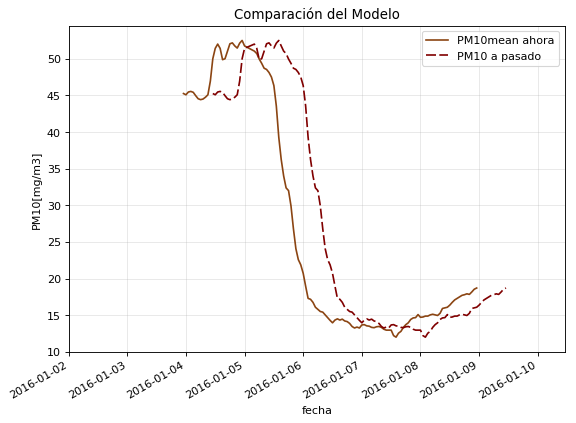

In [110]:
df_append['fecha'] =  pd.to_datetime(df_append['fecha'], format='%Y-%m-%d %H:%M')

import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()

# df_export.(50).plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="dodgerblue")
# df_export.(60).head(100).plot(x="fecha", y=["O3_y_frcst_6"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue',dashes=[6, 2])

df_append.head(200).plot(x="fecha", y=['PM10mean_0.0'],ax=ax,label=["PM10mean ahora"],color="saddlebrown")
#df_append.tail(200).plot(x="fecha", y=["PM10mean_max_frcst_24"],ax=ax,label=["PM10 pronostico 12"],color="blue")
df_append.head(200).plot(x="fecha", y=["PM10mean_12.0"],ax=ax,label=["PM10 a pasado"],color='maroon',dashes=[6, 2])

plt.ylabel("PM10[mg/m3]")
plt.title("Comparación del Modelo")


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.01)
ax.grid(which='major', alpha=0.3)



plt.legend()
plt.show()

## Groupbys

In [58]:
## perdemos información geográfica, DETALLAR!!!

In [59]:
cols = df_append.columns.tolist()

In [60]:
cols.remove("id_station")

Finalmente, aplicamos los groupbys:

In [61]:
data_hour_merge_24_mean = df_append.groupby(['fecha']).mean()
data_hour_merge_24_mean.reset_index(inplace=True)

In [62]:
data_hour_merge_24_max = df_append.groupby(['fecha']).max()
data_hour_merge_24_max.reset_index(inplace=True)

In [63]:
data_hour_merge_24_min = df_append.groupby(['fecha']).min()
data_hour_merge_24_min.reset_index(inplace=True)

## Cambiamos los nombres:

In [64]:
max_columns = data_hour_merge_24_max.columns.tolist()
min_columns = data_hour_merge_24_min.columns.tolist()
mean_columns = data_hour_merge_24_mean.columns.tolist()

In [65]:
for i in range(len(max_columns)):
    if max_columns[i] not in ['fecha','hora','dia','mes','id_station']:
        max_columns[i] = max_columns[i]+"_max"
        min_columns[i] = min_columns[i]+"_min"    
        mean_columns[i] = mean_columns[i]+"_mean"

In [66]:
data_hour_merge_24_mean.columns = mean_columns
data_hour_merge_24_min.columns = min_columns
data_hour_merge_24_max.columns = max_columns

##### Unamos los df's de manera que tengamos en una solo los datos promedio, máximo y minimo por día:

In [67]:
data_hour_merge = pd.merge(data_hour_merge_24_mean, data_hour_merge_24_max, on=['fecha'])
data_hour_merge = pd.merge(data_hour_merge, data_hour_merge_24_min, on=['fecha'])

guardamos el archivo:

In [68]:
data_hour_merge.to_csv("./datos_gb_" + contaminante + ".csv", sep=',', encoding='utf-8',index=False)

##### Leamos el archivo:

In [128]:
contaminante ="PM10"

In [129]:
data_hour_merge = pd.read_csv("./datos_gb_" + contaminante + ".csv", sep=',', encoding='utf-8')

In [130]:
data_hour_merge = data_hour_merge.sort_values(['fecha',"hora_x"], ascending=[0,1])
data_hour_merge.head(3)

,fecha,CO_mean,NO_mean,NO2_mean,NOX_mean,O3_mean,PM10_mean,PM10_0.0_mean,PM10_1.0_mean,PM10_10.0_mean,...,PM25mean_8.0_min,PM25mean_9.0_min,RH_min,SO2_min,TMP_min,WSP_min,dia,hora_y,id_station_y,mes
30000,2019-06-30 23:00:00,0.386957,2.523810,23.791667,26.714286,18.551724,28.785714,28.785714,23.285714,35.692308,...,10.458333,10.500000,55.0,0.0,9.1,0.4,30.0,23,AJM,6.0
29999,2019-06-30 22:00:00,0.443478,3.380952,25.291667,29.571429,19.793103,23.285714,23.285714,24.428571,35.461538,...,10.500000,10.666667,52.0,0.0,8.7,0.2,30.0,22,AJM,6.0
29998,2019-06-30 21:00:00,0.404348,2.571429,22.875000,26.190476,23.793103,24.428571,24.428571,28.928571,29.071429,...,10.666667,10.791667,53.0,0.0,10.4,0.7,30.0,21,AJM,6.0


## Correlacionados con el target.

Ahora vamos a sacar los atributos más correlacionado con el target, el target es la columna a pronosticar, por simplicidad solo vamos a sacar la correlación con target a las 12 horas:

Generemos los target de pronóstico:

Generemos el shift de 1 a 24 horas, ahora hacia adelante

In [131]:
if contaminante == 'PM10' or contaminante == 'PM2.5':
    item = contaminante+"mean_max"
else:
    item = contaminante+"_max" 

In [132]:
item

'PM10mean_max'

In [133]:
## DEtallar explicacion

#### definimos el 'PM10mean_y_frcst_24'

In [134]:
data_hour_merge

,fecha,CO_mean,NO_mean,NO2_mean,NOX_mean,O3_mean,PM10_mean,PM10_0.0_mean,PM10_1.0_mean,PM10_10.0_mean,...,PM25mean_8.0_min,PM25mean_9.0_min,RH_min,SO2_min,TMP_min,WSP_min,dia,hora_y,id_station_y,mes
30000,2019-06-30 23:00:00,0.386957,2.523810,23.791667,26.714286,18.551724,28.785714,28.785714,23.285714,35.692308,...,10.458333,10.500000,55.0,0.0,9.1,0.4,30.0,23,AJM,6.0
29999,2019-06-30 22:00:00,0.443478,3.380952,25.291667,29.571429,19.793103,23.285714,23.285714,24.428571,35.461538,...,10.500000,10.666667,52.0,0.0,8.7,0.2,30.0,22,AJM,6.0
29998,2019-06-30 21:00:00,0.404348,2.571429,22.875000,26.190476,23.793103,24.428571,24.428571,28.928571,29.071429,...,10.666667,10.791667,53.0,0.0,10.4,0.7,30.0,21,AJM,6.0
29997,2019-06-30 20:00:00,0.360870,2.000000,20.208333,22.714286,30.068966,28.928571,28.928571,41.714286,22.142857,...,10.791667,10.875000,49.0,1.0,12.5,1.1,30.0,20,AJM,6.0
29996,2019-06-30 19:00:00,0.347826,2.571429,18.958333,22.190476,37.068966,41.714286,41.714286,45.571429,27.692308,...,10.875000,10.791667,43.0,1.0,12.7,1.3,30.0,19,AJM,6.0
29995,2019-06-30 18:00:00,0.313043,2.476190,14.583333,18.047619,43.137931,45.571429,45.571429,23.307692,25.285714,...,10.791667,10.458333,37.0,1.0,12.5,1.4,30.0,18,AJM,6.0
29994,2019-06-30 17:00:00,0.195652,1.285714,9.375000,10.904762,50.103448,23.307692,23.307692,27.833333,18.142857,...,10.458333,9.958333,34.0,1.0,11.7,1.9,30.0,17,AJM,6.0
29993,2019-06-30 16:00:00,0.147826,0.857143,7.666667,9.047619,65.724138,27.833333,27.833333,29.500000,18.769231,...,9.958333,10.083333,29.0,1.0,13.9,1.4,30.0,16,AJM,6.0
29992,2019-06-30 15:00:00,0.168182,0.800000,7.739130,9.400000,73.321429,29.500000,29.500000,27.000000,12.181818,...,10.083333,9.916667,29.0,1.0,16.8,1.9,30.0,15,AJM,6.0
29991,2019-06-30 14:00:00,0.208696,1.333333,8.708333,10.571429,72.620690,27.000000,27.000000,35.692308,13.153846,...,9.916667,9.875000,27.0,1.0,16.9,1.5,30.0,14,AJM,6.0


In [135]:
data_hour_merge[str(item+"_frcst_"+str(24))] = data_hour_merge[item].shift(24)

In [136]:
str(item+"_frcst_"+str(24))

'PM10mean_max_frcst_24'

In [137]:
target = str(item+"_frcst_"+ str(24))

In [138]:
target

'PM10mean_max_frcst_24'

In [139]:
data_hour_merge.columns.tolist()

['fecha',
 'CO_mean',
 'NO_mean',
 'NO2_mean',
 'NOX_mean',
 'O3_mean',
 'PM10_mean',
 'PM10_0.0_mean',
 'PM10_1.0_mean',
 'PM10_10.0_mean',
 'PM10_11.0_mean',
 'PM10_12.0_mean',
 'PM10_13.0_mean',
 'PM10_14.0_mean',
 'PM10_15.0_mean',
 'PM10_16.0_mean',
 'PM10_17.0_mean',
 'PM10_18.0_mean',
 'PM10_19.0_mean',
 'PM10_2.0_mean',
 'PM10_20.0_mean',
 'PM10_21.0_mean',
 'PM10_22.0_mean',
 'PM10_23.0_mean',
 'PM10_24.0_mean',
 'PM10_25.0_mean',
 'PM10_26.0_mean',
 'PM10_27.0_mean',
 'PM10_28.0_mean',
 'PM10_3.0_mean',
 'PM10_4.0_mean',
 'PM10_5.0_mean',
 'PM10_6.0_mean',
 'PM10_7.0_mean',
 'PM10_8.0_mean',
 'PM10_9.0_mean',
 'PM10mean_mean',
 'PM10mean_0.0_mean',
 'PM10mean_1.0_mean',
 'PM10mean_10.0_mean',
 'PM10mean_11.0_mean',
 'PM10mean_12.0_mean',
 'PM10mean_13.0_mean',
 'PM10mean_14.0_mean',
 'PM10mean_15.0_mean',
 'PM10mean_16.0_mean',
 'PM10mean_17.0_mean',
 'PM10mean_18.0_mean',
 'PM10mean_19.0_mean',
 'PM10mean_2.0_mean',
 'PM10mean_20.0_mean',
 'PM10mean_21.0_mean',
 'PM10mean_22

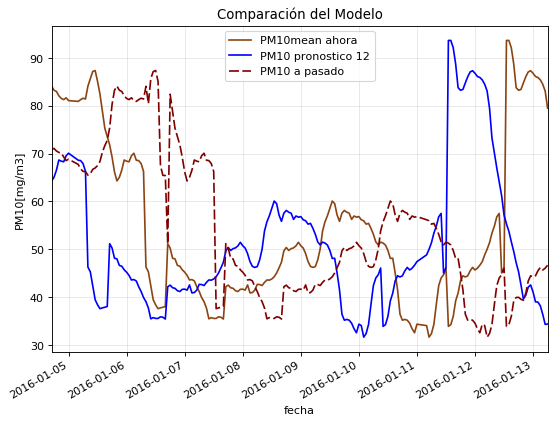

In [159]:
data_hour_merge['fecha'] =  pd.to_datetime(data_hour_merge['fecha'], format='%Y-%m-%d %H:%M')


import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()

# df_export.(50).plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="dodgerblue")
# df_export.(60).head(100).plot(x="fecha", y=["O3_y_frcst_6"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue',dashes=[6, 2])

data_hour_merge.tail(200).plot(x="fecha", y=['PM10mean_0.0_max'],ax=ax,label=["PM10mean ahora"],color="saddlebrown")
data_hour_merge.tail(200).plot(x="fecha", y=["PM10mean_max_frcst_24"],ax=ax,label=["PM10 pronostico 12"],color="blue")
data_hour_merge.tail(200).plot(x="fecha", y=["PM10mean_24.0_max"],ax=ax,label=["PM10 a pasado"],color='maroon',dashes=[6, 2])

plt.ylabel("PM10[mg/m3]")
plt.title("Comparación del Modelo")


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.01)
ax.grid(which='major', alpha=0.3)



plt.legend()
plt.show()

Saquemos la correlación:

In [141]:
data_corr = data_hour_merge.corr()

Guardamos los atributos mas correlacionados en una lista:

- 0.47 para PM10
- 0.4 para O3

In [142]:
variables_mas_correlacionadas_pm10_mean = data_corr[target][(data_corr[target] > 0.47) |
                                                                           (data_corr[target] < -0.47)].index.tolist()

In [143]:
len(variables_mas_correlacionadas_pm10_mean)

167

In [144]:
##declarar suposición

In [145]:
variables_mas_correlacionadas_pm10_mean.append("RH_mean")#PM10
variables_mas_correlacionadas_pm10_mean.append("WSP_mean")
variables_mas_correlacionadas_pm10_mean.append("TMP_mean")
variables_mas_correlacionadas_pm10_mean = list(set(variables_mas_correlacionadas_pm10_mean))

Guardemos estas variables, no pueden cambiarse una vez que los modelos estan entrenados:

In [146]:
variables_mas_correlacionadas_pm10_mean.append("fecha")

Filtremos el DF con las variables mas correlacionadas:

In [147]:
data_hour_merge = data_hour_merge[variables_mas_correlacionadas_pm10_mean]

Añadamos los datos de pronostico de las siguientes variables:

In [148]:
lista_frcst = ["RH_mean","WSP_mean","TMP_mean"]

In [149]:
for item in lista_frcst:
    for i in range(1, 25):
        col_name = str(item+"_frcst_"+str(i))
        data_hour_merge[col_name] = data_hour_merge[item].shift(i)
data_hour_merge.dropna(inplace=True)

In [150]:
data_corr_2 = data_hour_merge.corr()

variables_mas_correlacionadas_con_pronóstico = data_corr_2[target][(data_corr_2[target] > 0.5) |                                                                
                                                            (data_corr_2[target] < -0.5)].index.tolist()

In [151]:
variables_mas_correlacionadas_con_pronóstico.append("fecha")

In [152]:
data_hour_merge = data_hour_merge[variables_mas_correlacionadas_con_pronóstico]

Guardemos:

In [153]:
if contaminante == 'PM10' or contaminante == 'PM2.5':
    item = contaminante+"mean_max"
else:
    item = contaminante+"_max" 

In [154]:
for i in range(1, 25):
    col_name = str(item+"_frcst_"+str(i))
    data_hour_merge[col_name] = data_hour_merge[item].shift(i)
    if i==range(1, 25)[-1]:
        print(i)
data_hour_merge.dropna(inplace=True)

24


In [155]:
data_hour_merge.to_csv("./datos_modelos_"+ contaminante + ".csv",sep=',', encoding='utf-8',index=False)

In [156]:
data_hour_merge.shape

(29155, 141)

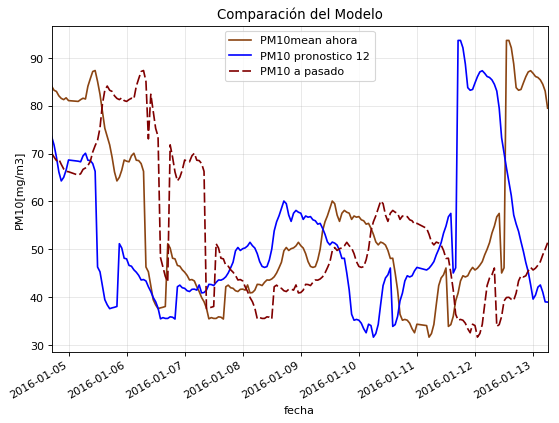

In [158]:
import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()

# df_export.(50).plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="dodgerblue")
# df_export.(60).head(100).plot(x="fecha", y=["O3_y_frcst_6"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue',dashes=[6, 2])

data_hour_merge.tail(200).plot(x="fecha", y=["PM10mean_0.0_max"],ax=ax,label=["PM10mean ahora"],color="saddlebrown")
data_hour_merge.tail(200).plot(x="fecha", y=["PM10mean_max_frcst_20"],ax=ax,label=["PM10 pronostico 12"],color="blue")
data_hour_merge.tail(200).plot(x="fecha", y=["PM10mean_20.0_max"],ax=ax,label=["PM10 a pasado"],color='maroon',dashes=[6, 2])

plt.ylabel("PM10[mg/m3]")
plt.title("Comparación del Modelo")


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.01)
ax.grid(which='major', alpha=0.3)



plt.legend()
plt.show()